### Importing Important Modules and Database connectors

In [1]:
! pip install chembl_webresource_client

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 KB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 KB 4.2 MB/s eta 0:00:00
  Attempting uninstall: attrs
    Found existing installation: attrs 22.2.0
    Uninstalling attrs-22.2.0:
      Successfully uninstalled attrs-22.2.0


In [2]:
import pandas as pd
import numpy as np
from chembl_webresource_client.new_client import new_client
import matplotlib.pyplot as plt

### Collecting And Processing Data
* Our main goal is to process the target protien structure `independent variable`
* And predict the `IC50` value the `dependent variable`
* To process the chemical structure Ww will be using `Padel Descripter` later on

In [3]:
target = new_client.target
target_query = target.search('hepatitis')
target_result = pd.DataFrame.from_dict(target_query)

In [4]:
target_result

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Homo sapiens,Hepatitis A virus cellular receptor 2,14.0,False,CHEMBL4630879,"[{'accession': 'Q8TDQ0', 'component_descriptio...",SINGLE PROTEIN,9606
1,[],Hepatitis B virus,Hepatitis B virus,11.0,False,CHEMBL613497,[],ORGANISM,10407
2,[],Hepatitis C virus,Hepatitis C virus,11.0,False,CHEMBL379,[],ORGANISM,11103
3,[],Murine hepatitis virus,Murine hepatitis virus,11.0,False,CHEMBL613733,[],ORGANISM,11138
4,[],Hepatitis A virus,Hepatitis A virus,11.0,False,CHEMBL613753,[],ORGANISM,12092
5,[],Woodchuck hepatitis virus,Woodchuck hepatitis virus,11.0,False,CHEMBL613179,[],ORGANISM,35269
6,[],Hepatitis delta virus,Hepatitis delta virus,11.0,False,CHEMBL4888466,[],ORGANISM,12475
7,"[{'xref_id': 'P26664', 'xref_name': None, 'xre...",Hepatitis C virus genotype 1a (isolate 1) (HCV),Hepatitis C virus polyprotein,10.0,False,CHEMBL4620,"[{'accession': 'P26664', 'component_descriptio...",SINGLE PROTEIN,11104
8,[],Duck hepatitis B virus,Duck hepatitis B virus,10.0,False,CHEMBL613761,[],ORGANISM,12639
9,"[{'xref_id': 'Q15004', 'xref_name': None, 'xre...",Homo sapiens,PCNA-associated factor,10.0,False,CHEMBL5574,"[{'accession': 'Q15004', 'component_descriptio...",SINGLE PROTEIN,9606


In [5]:
selected_target1 = target_result.target_chembl_id[1]
selected_target1

'CHEMBL613497'

In [6]:
activity1 = new_client.activity
res = activity1.filter(target_chembl_id=selected_target1).filter(standard_type='IC50')
df1 = pd.DataFrame.from_dict(res)

In [7]:
df1.head(3)

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,78865,[],CHEMBL872001,Inhibitory activity was determined against Hep...,F,None,None,BAO_0000190,BAO_0000218,...,Hepatitis B virus,Hepatitis B virus,10407,None,None,IC50,uM,UO_0000065,None,4.4
1,None,97400,[],CHEMBL872001,Inhibitory activity was determined against Hep...,F,None,None,BAO_0000190,BAO_0000218,...,Hepatitis B virus,Hepatitis B virus,10407,None,None,IC50,uM,UO_0000065,None,2.1
2,None,281503,[],CHEMBL824013,Tested for antiviral activity against HBV (Hep...,F,None,None,BAO_0000190,BAO_0000218,...,Hepatitis B virus,Hepatitis B virus,10407,None,None,IC50,ug ml-1,UO_0000274,None,50.0


### Only Selecting the required Columns

In [8]:
columns = ['canonical_smiles','molecule_chembl_id','standard_value']

In [9]:
df1_selected = df1[columns]

In [10]:
len(df1_selected)

2829

### Fixing Missing Values
* For that I am using mean() of the column `standard_value`
* For values greater than `100000000` I am going to limit it to `100000000` so after converting to log value it will not show any negative value
* Then we will finally apply to convert all `standard_value` to log of `standard_value` so it will fix high deviation and outliers(most of them atleast)

In [11]:
df1_selected.isnull().sum()

canonical_smiles        0
molecule_chembl_id      0
standard_value        125
dtype: int64

In [12]:
df1_selected['standard_value'].dtype

dtype('O')

In [13]:
df1_selected['standard_value'] = df1_selected['standard_value'].astype(float)

<ipython-input-13-3a9a20ee965c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_selected['standard_value'] = df1_selected['standard_value'].astype(float)


In [14]:
df1_selected['standard_value'].dtype

dtype('float64')

In [15]:
df1_selected['standard_value'].head(3)

0    4400.0
1    2100.0
2      50.0
Name: standard_value, dtype: float64

In [16]:
try:
  df1_selected['standard_value'].fillna(df1_selected['standard_value'].mean(),inplace=True)
except:
  pass

/usr/local/lib/python3.9/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [17]:
df1_selected.isnull().sum()

canonical_smiles      0
molecule_chembl_id    0
standard_value        0
dtype: int64

In [18]:
len(df1_selected)

2829

In [19]:
def norm_val(data):
  for i in data['standard_value']:
    if i > 100000000:
      data['standard_value'] = data['standard_value'].replace(i,100000000)
  return data['standard_value']

In [20]:
def convert_log(data):
  pIC50 = []
  for i in data['standard_value']:
    data['standard_value'] = data['standard_value'].replace(i,-np.log10(i*(10**-9)))
  return data['standard_value']

In [21]:
df1_selected.describe()

,standard_value
count,2.829000e+03
mean,6.023890e+05
std,2.047199e+06
min,2.220000e-03
25%,6.830000e+03
50%,6.746000e+04
75%,6.023890e+05
max,3.800000e+07


In [22]:
df1_selected['standard_value'] = norm_val(df1_selected)

<ipython-input-22-1651fe78b754>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_selected['standard_value'] = norm_val(df1_selected)


In [23]:
df1_selected['standard_value'] = convert_log(df1_selected)

<ipython-input-20-31a96a23224e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['standard_value'] = data['standard_value'].replace(i,-np.log10(i*(10**-9)))
<ipython-input-23-dc51576c3f0d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_selected['standard_value'] = convert_log(df1_selected)


In [24]:
df1_selected['standard_value'].head()

0    8.092458
1    8.091923
2    8.091947
3    8.091947
4    7.346787
Name: standard_value, dtype: float64

In [25]:
df1_selected.isnull().sum()

canonical_smiles      0
molecule_chembl_id    0
standard_value        0
dtype: int64

In [26]:
try:
  df1_selected.replace([np.inf, -np.inf], np.nan, inplace=True)
  df1_selected['standard_value'].fillna(df1_selected['standard_value'].mean(),inplace=True)
except:
  pass

/usr/local/lib/python3.9/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(
/usr/local/lib/python3.9/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


### Creating labels and features

In [27]:
df1_x = df1_selected.drop(columns=['standard_value'],axis=1)
df1_y = df1_selected['standard_value']

In [28]:
len(df1_x),len(df1_y)

(2829, 2829)

In [29]:
df1_x.to_csv('molecule.smi', sep='\t', index=False, header=False)
df1_y.to_csv('hepatitisB_labels.csv',index=False)

### A quick look at files

In [30]:
! ls

hepatitisB_labels.csv  molecule.smi  sample_data


In [31]:
! cat molecule.smi | head -5

COc1ccc(CCNP(=O)(O)OC[C@H]2O[C@@H](n3ccc(=O)[nH]c3=O)[C@H](OC)[C@@H]2OP(=O)(O)OC[C@H]2O[C@@H](n3cnc4c(N)ncnc43)C[C@@H]2O)cc1OC	CHEMBL2368780
Nc1nc(O)c2ncn([C@H]3C[C@H](O)[C@@H](COP(=O)(O)O[C@@H]4C[C@@H](n5cnc6c(N)ncnc65)O[C@H]4COP(=O)(O)NC4CCCN4)O3)c2n1	CHEMBL2368779
Nc1nc2c(ncn2COCCO)c(=O)[nH]1	CHEMBL184
Nc1nc(O)c2ncn(C3C=CC(CO)C(O)C3)c2n1	CHEMBL289718
Nc1nc2c(ncn2COC(CO)CO)c(=O)[nH]1	CHEMBL182


### Using padel Descriptor to break it into dataset form

In [32]:

! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

--2023-03-10 02:14:14--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2023-03-10 02:14:14--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip’

padel.zip           100%[===================>]  24.57M  --.-KB/s    in 0.1s    

2023-03-10 02:14:14 (231 MB/s) - ‘padel.zip’ saved [25768637/25768637]

--2023-03-10 02:14:14--  https://github

In [33]:
! unzip padel.zip

Archive:  padel.zip
   creating: PaDEL-Descriptor/
  inflating: __MACOSX/._PaDEL-Descriptor  
  inflating: PaDEL-Descriptor/MACCSFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml  
  inflating: PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml  
  inflating: PaDEL-Descriptor/EStateFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._EStateFingerprinter.xml  
  inflating: PaDEL-Descriptor/Fingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._Fingerprinter.xml  
  inflating: PaDEL-Descriptor/.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._.DS_Store  
   creating: PaDEL-Descriptor/license/
  inflating: __MACOSX/PaDEL-Descriptor/._license  
  inflating: PaDEL-Descriptor/KlekotaRothFingerprintCount.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._KlekotaRothFingerprintCount.xml  
  inflating: PaDEL-Descriptor/config  
  inflating: __MACOSX/PaDEL-Descriptor/._config  
  inf

In [34]:
! bash padel.sh

Processing CHEMBL2368780 in molecule.smi (1/2829). 
Processing CHEMBL2368779 in molecule.smi (2/2829). 
Processing CHEMBL289718 in molecule.smi (4/2829). Average speed: 3.32 s/mol.
Processing CHEMBL184 in molecule.smi (3/2829). Average speed: 6.35 s/mol.
Processing CHEMBL182 in molecule.smi (5/2829). Average speed: 2.22 s/mol.
Processing CHEMBL289718 in molecule.smi (6/2829). Average speed: 1.75 s/mol.
Processing CHEMBL220940 in molecule.smi (7/2829). Average speed: 1.42 s/mol.
Processing CHEMBL483492 in molecule.smi (8/2829). Average speed: 1.22 s/mol.
Processing CHEMBL2092834 in molecule.smi (9/2829). Average speed: 1.08 s/mol.
Processing CHEMBL483492 in molecule.smi (11/2829). Average speed: 0.88 s/mol.
Processing CHEMBL2092835 in molecule.smi (10/2829). Average speed: 0.97 s/mol.
Processing CHEMBL2092833 in molecule.smi (12/2829). Average speed: 0.90 s/mol.
Processing CHEMBL2092833 in molecule.smi (13/2829). Average speed: 0.77 s/mol.
Processing CHEMBL2092834 in molecule.smi (15/28

### Model selection and usage

### Importing Modules

In [35]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor , ExtraTreesRegressor
from sklearn.linear_model import Lasso,Ridge,OrthogonalMatchingPursuit,LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, KFold , cross_val_score
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

### Using different models and importing processed data 

In [79]:
X = pd.read_csv('descriptors_output.csv')
Y = pd.read_csv('hepatitisB_labels.csv')

In [80]:
X = X.dropna(axis=0)
Y = Y.drop(2812,axis=0)

In [82]:
len(X),len(Y)

(2828, 2828)

In [83]:
Y['standard_value'].isnull().sum()

0

In [84]:
for i in Y['standard_value']:
  Y['standard_value'] = Y['standard_value'].replace(i,round(i,2))

In [85]:
Y.standard_value.unique()

array([ 8.09,  7.35,  8.2 ,  5.15,  5.72,  8.18,  8.3 ,  8.32,  5.34,
        8.22,  4.27,  8.45,  8.19,  4.71,  5.89,  8.08,  4.3 ,  8.26,
        5.49,  8.21,  4.52,  8.07,  2.85,  2.54,  8.06,  8.61,  8.62,
        2.67,  8.29,  4.38,  8.48,  2.88,  8.6 ,  2.69,  2.52,  2.63,
        2.43,  2.38,  2.41,  2.48,  2.53,  2.34,  4.47,  4.8 ,  5.43,
        6.03,  8.31,  5.09,  5.1 ,  5.67,  8.28,  5.27,  5.23,  5.61,
        4.97,  2.98,  2.47,  3.03,  3.17,  2.76,  3.33,  2.13,  2.51,
        8.35,  9.1 ,  8.51,  8.43,  3.54,  4.17,  4.36,  1.74,  4.03,
        1.42,  3.94,  3.91,  5.63,  4.63,  4.22,  5.4 ,  4.6 ,  8.39,
        8.82,  9.22,  8.92, 10.3 ,  9.52,  9.7 ,  9.4 ,  3.31,  3.89,
        3.85,  3.47,  3.45,  3.71,  3.14,  3.78,  3.53,  3.59,  3.73,
        3.12,  8.59,  4.1 ,  2.73,  2.26,  2.44,  2.4 ,  2.35,  2.49,
        8.57,  2.37,  2.39,  2.27,  3.08,  3.35,  3.26,  2.22,  2.65,
        4.34,  4.48,  8.34,  4.44,  8.36,  5.07,  4.76,  4.01,  4.68,
        4.79,  4.19,

In [86]:
Y.describe()

,standard_value
count,2828.000000
mean,6.424459
std,2.130163
min,1.420000
25%,4.300000
50%,8.080000
75%,8.090000
max,11.650000


In [87]:
Y = Y.to_numpy().ravel()
X = X.drop(columns=['Name'],axis=1)

In [88]:
X.head(5)

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [89]:
Y[:5]

array([8.09, 8.09, 8.09, 8.09, 7.35])

In [90]:
X.shape

(2828, 881)

### Defining all the Regressors

In [91]:
rfe = RandomForestRegressor(n_estimators = 100)
dtree = DecisionTreeRegressor()
svr = SVR()
etree = ExtraTreesRegressor()
lin_reg = LinearRegression()
lasso = Lasso()
ridge = Ridge()
oth = OrthogonalMatchingPursuit()

In [92]:
def evaluation(y,predictions):
    mae = mean_absolute_error(y,predictions)
    mse = mean_squared_error(y,predictions)
    rmse = np.sqrt(mean_squared_error(y,predictions))
    r2 = r2_score(y,predictions)
    return mae,mse,rmse,r2

### Using different regressors and finding best fit model for our dataset

In [93]:
rmse_arr = []
r2_arr=[]

### Random Forest Tree

In [94]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=100)
rfe.fit(X_train,Y_train)
Y_pred = rfe.predict(X_test)
mae,mse,rmse,r2 = evaluation(Y_test,Y_pred)
r2_arr.append(r2)
rmse_arr.append(rmse)
print("R sqaured value :",r2)
print("")
print("Mean Sqaured Error :",mse)
print("")
print("Mean Absolute Error :",mae)
print("")
print("Root Mean Squared :",rmse)

R sqaured value : 0.23075122532423742

Mean Sqaured Error : 3.5680926519395917

Mean Absolute Error : 1.320769527531676

Root Mean Squared : 1.888939557513578


### Decision Tree Regressor

In [95]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=100)
dtree.fit(X_train,Y_train)
Y_pred = dtree.predict(X_test)
mae,mse,rmse,r2 = evaluation(Y_test,Y_pred)
r2_arr.append(r2)
rmse_arr.append(rmse)
print("R sqaured value :",r2)
print("")
print("Mean Sqaured Error :",mse)
print("")
print("Mean Absolute Error :",mae)
print("")
print("Root Mean Squared :",rmse)

R sqaured value : 0.04239926927283866

Mean Sqaured Error : 4.441746601728093

Mean Absolute Error : 1.3633216010659521

Root Mean Squared : 2.1075451600684842


### Support Vector Regressor

In [96]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=100)
svr.fit(X_train,Y_train)
Y_pred = svr.predict(X_test)
mae,mse,rmse,r2 = evaluation(Y_test,Y_pred)
rmse_arr.append(rmse)
r2_arr.append(r2)
print("R sqaured value :",r2)
print("")
print("Mean Sqaured Error :",mse)
print("")
print("Mean Absolute Error :",mae)
print("")
print("Root Mean Squared :",rmse)

R sqaured value : 0.20748628570537997

Mean Sqaured Error : 3.676005024158648

Mean Absolute Error : 1.2977868239248564

Root Mean Squared : 1.9172910640167935


### Extra Tree Regression

In [97]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=100)
etree.fit(X_train,Y_train)
Y_pred = etree.predict(X_test)
mae,mse,rmse,r2 = evaluation(Y_test,Y_pred)
r2_arr.append(r2)
rmse_arr.append(rmse)
print("R sqaured value :",r2)
print("")
print("Mean Sqaured Error :",mse)
print("")
print("Mean Absolute Error :",mae)
print("")
print("Root Mean Squared :",rmse)

R sqaured value : 0.05461148988882081

Mean Sqaured Error : 4.385101292592414

Mean Absolute Error : 1.3530496379721173

Root Mean Squared : 2.0940633449331028


### Lasso Regression

In [98]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=100)
lasso.fit(X_train,Y_train)
Y_pred = lasso.predict(X_test)
mae,mse,rmse,r2 = evaluation(Y_test,Y_pred)
rmse_arr.append(rmse)
r2_arr.append(r2)
print("R sqaured value :",r2)
print("")
print("Mean Sqaured Error :",mse)
print("")
print("Mean Absolute Error :",mae)
print("")
print("Root Mean Squared :",rmse)

R sqaured value : -0.006714248556776603

Mean Sqaured Error : 4.669555326093782

Mean Absolute Error : 2.0200740924726546

Root Mean Squared : 2.160915390776275


### Ridge Regression

In [99]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=100)
ridge.fit(X_train,Y_train)
Y_pred = ridge.predict(X_test)
mae,mse,rmse,r2 = evaluation(Y_test,Y_pred)
r2_arr.append(r2)
rmse_arr.append(rmse)
print("R sqaured value :",r2)
print("")
print("Mean Sqaured Error :",mse)
print("")
print("Mean Absolute Error :",mae)
print("")
print("Root Mean Squared :",rmse)

R sqaured value : 0.2962818319628019

Mean Sqaured Error : 3.2641347078755794

Mean Absolute Error : 1.398423977427139

Root Mean Squared : 1.8066916471483394


### Orthogonal Matching Pursuit Regressor

In [100]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=100)
oth.fit(X_train,Y_train)
Y_pred = oth.predict(X_test)
mae,mse,rmse,r2 = evaluation(Y_test,Y_pred)
r2_arr.append(r2)
rmse_arr.append(rmse)
print("R sqaured value :",r2)
print("")
print("Mean Sqaured Error :",mse)
print("")
print("Mean Absolute Error :",mae)
print("")
print("Root Mean Squared :",rmse)

R sqaured value : 0.2727379138655489

Mean Sqaured Error : 3.3733410971819313

Mean Absolute Error : 1.4410231150860116

Root Mean Squared : 1.8366657554334516


### Linear Regression

In [101]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=100)
lin_reg.fit(X_train,Y_train)
Y_pred = lin_reg.predict(X_test)
mae,mse,rmse,r2 = evaluation(Y_test,Y_pred)
r2_arr.append(r2)
rmse_arr.append(rmse)
print("R sqaured value :",r2)
print("")
print("Mean Sqaured Error :",mse)
print("")
print("Mean Absolute Error :",mae)
print("")
print("Root Mean Squared :",rmse)

R sqaured value : -6024342927801745.0

Mean Sqaured Error : 2.7943383780512292e+16

Mean Absolute Error : 7026379.819785954

Root Mean Squared : 167162746.38959572


### Model Performance

In [102]:
import seaborn as sns

In [103]:
di = {"Name":["Random Forest","Decision Tree","Support Vector","Extra Tree","Lasso","Ridge","Orthogonal","Linear"],
      "RMSE":rmse_arr,"R_Sq":r2_arr}

In [104]:
model_performance = pd.DataFrame.from_dict(di)

In [105]:
model_performance

,Name,RMSE,R_Sq
0,Random Forest,1.888940e+00,2.307512e-01
1,Decision Tree,2.107545e+00,4.239927e-02
2,Support Vector,1.917291e+00,2.074863e-01
3,Extra Tree,2.094063e+00,5.461149e-02
4,Lasso,2.160915e+00,-6.714249e-03
5,Ridge,1.806692e+00,2.962818e-01
6,Orthogonal,1.836666e+00,2.727379e-01
7,Linear,1.671627e+08,-6.024343e+15


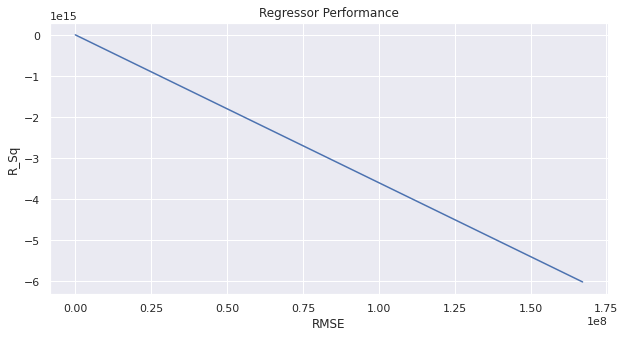

In [106]:
sns.set(rc={'figure.figsize':(10,5)})
ax = sns.lineplot(x='RMSE',y='R_Sq',data=model_performance).set(title='Regressor Performance')

### Using model with lowest rmse

In [107]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=100)
lin_reg.fit(X_train,Y_train)
Y_pred = lin_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(Y_test,Y_pred))

In [108]:
rmse

167162746.38959572

### Saving model state for later use

In [109]:
import pickle

pickle.dump(svr,open("hepatitisB_model.pkl","wb"))